In [1]:
import wikipedia
import re
from collections import Counter
import math

NUM_WORDS = 60

In [2]:
frog = wikipedia.page("Frog", auto_suggest=False)

In [3]:
frog.summary

'A frog is any member of a diverse and largely carnivorous group of short-bodied, tailless amphibians composing the order Anura (ἀνούρα, literally without tail in Ancient Greek). The oldest fossil "proto-frog" Triadobatrachus is known from the Early Triassic of Madagascar, but molecular clock dating suggests their split from other amphibians may extend further back to the Permian, 265 million years ago. Frogs are widely distributed, ranging from the tropics to subarctic regions, but the greatest concentration of species diversity is in tropical rainforest. Frogs account for around 88% of extant amphibian species. They are also one of the five most diverse vertebrate orders. Warty frog species tend to be called toads, but the distinction between frogs and toads is informal, not from taxonomy or evolutionary history.\nAn adult frog has a stout body, protruding eyes, anteriorly-attached tongue, limbs folded underneath, and no tail (the tail of tailed frogs is an extension of the male cloa

In [4]:
words = re.findall(r"[a-z][a-z'-]+", frog.content.lower())
len(words)

12617

In [12]:
# Remove 'stop-words'
stop_words = set(open('../stop-words.txt').read().split())
print(stop_words)

{'their', 'they', 'ought', "weren't", 'them', 'by', 'themselves', 'are', 'has', 'had', 'ours', 'am', 'we', 'the', 'where', 'his', 'ourselves', 'while', "what's", "hasn't", 'he', 'myself', 'below', 'then', 'cannot', 'this', 'same', 'being', 'does', 'during', 'so', 'also', 'most', 'should', "they've", 'out', 'because', 'some', 'theirs', "aren't", "they're", 'get', "here's", 'nor', 'been', 'about', 'who', 'yourself', 'both', 'me', "doesn't", 'to', "we'll", 'how', 'until', "we'd", 'own', 'our', 'i', 'can', "she's", 'my', "she'd", "we're", "shouldn't", "where's", "you've", 'here', 'for', 'those', "who's", 'and', 'between', "haven't", 'see', 'such', 'not', 'when', "isn't", "he'd", 'all', 'doing', 'over', 'will', 'do', "wouldn't", "don't", 'himself', 'into', "i'll", 'its', 'of', "they'll", "they'd", 'above', "i'd", 'be', 'before', "there's", 'down', "you'd", "couldn't", 'it', 'only', 'what', "mustn't", "we've", 'these', 'have', "why's", "how's", 'but', 'whom', 'few', 'further', "it's", 'after

In [6]:
counter_words = Counter(w for w in words if w not in stop_words)
counter_words.most_common(NUM_WORDS)

[('frogs', 193),
 ('frog', 161),
 ('species', 87),
 ('water', 51),
 ('skin', 46),
 ('eggs', 42),
 ('may', 40),
 ('many', 37),
 ('tadpoles', 33),
 ('toad', 31),
 ('body', 28),
 ('one', 25),
 ('male', 25),
 ('used', 25),
 ('tree', 24),
 ('two', 23),
 ('legs', 22),
 ('toads', 21),
 ('years', 20),
 ('small', 19),
 ('use', 19),
 ('first', 19),
 ('feet', 19),
 ('breeding', 18),
 ('time', 18),
 ('poison', 18),
 ('tail', 17),
 ('limbs', 17),
 ('predators', 17),
 ('food', 17),
 ('common', 17),
 ('including', 17),
 ('hind', 17),
 ('large', 17),
 ('known', 16),
 ('surface', 16),
 ('glands', 16),
 ('female', 16),
 ('early', 15),
 ('back', 15),
 ('around', 15),
 ('aquatic', 15),
 ('live', 14),
 ('larvae', 14),
 ('different', 14),
 ('often', 14),
 ('calls', 14),
 ('amphibians', 13),
 ('hatch', 13),
 ('include', 13),
 ('males', 13),
 ('call', 13),
 ('million', 12),
 ('eyes', 12),
 ('adapted', 12),
 ('tadpole', 12),
 ('modern', 12),
 ('development', 12),
 ('similar', 12),
 ('american', 12)]

In [7]:
# If we have a word with and without a 's' at the end, like 'frog' and 'frogs'
# we add the counts of both version and remove the version with an 's' at the end from the dict
counter_words_keys = counter_words.copy().keys()
for k in counter_words_keys :
    # if last letter is a 's'
    if k[-1] == 's':
        # and the word without 's' at the end is in the set
        if k[:-1] in counter_words_keys:
            # add the count of both version
            counter_words[k[:-1]] += counter_words[k] 
            # remove the version with an 's'
            del counter_words[k]
            
counter_words_list = counter_words.most_common(NUM_WORDS)
counter_words_list

[('frog', 354),
 ('species', 87),
 ('skin', 52),
 ('toad', 52),
 ('water', 51),
 ('egg', 48),
 ('tadpole', 45),
 ('may', 40),
 ('male', 38),
 ('many', 37),
 ('tree', 30),
 ('body', 28),
 ('one', 27),
 ('leg', 27),
 ('call', 27),
 ('year', 26),
 ('used', 25),
 ('time', 24),
 ('use', 23),
 ('two', 23),
 ('predator', 23),
 ('female', 23),
 ('poison', 22),
 ('limb', 21),
 ('tail', 20),
 ('amphibian', 20),
 ('small', 19),
 ('first', 19),
 ('feet', 19),
 ('breeding', 18),
 ('surface', 18),
 ('adult', 17),
 ('food', 17),
 ('common', 17),
 ('including', 17),
 ('include', 17),
 ('hind', 17),
 ('eye', 17),
 ('large', 17),
 ('known', 16),
 ('back', 16),
 ('live', 16),
 ('glands', 16),
 ('toe', 16),
 ('make', 16),
 ('early', 15),
 ('around', 15),
 ('aquatic', 15),
 ('larvae', 14),
 ('part', 14),
 ('different', 14),
 ('often', 14),
 ('muscle', 14),
 ('help', 14),
 ('head', 14),
 ('hatch', 13),
 ('become', 13),
 ('place', 13),
 ('million', 12),
 ('adapted', 12)]

In [8]:
# Map from number of occurences to font size, log scale
MAX_FONT_SIZE, MIN_FONT_SIZE = 128, 18

# Linear scaling
# f = lambda x : x 
# Log scaling
f = lambda x : math.log(x)

max, min  = counter_words_list[0][1], counter_words_list[-1][1]
word_size_list = [(k, int(remap(f(v), f(min), f(max), MIN_FONT_SIZE, MAX_FONT_SIZE))) for k, v in counter_words_list]
word_size_list

[('frog', 128),
 ('species', 82),
 ('skin', 65),
 ('toad', 65),
 ('water', 65),
 ('egg', 63),
 ('tadpole', 60),
 ('may', 57),
 ('male', 55),
 ('many', 54),
 ('tree', 47),
 ('body', 45),
 ('one', 44),
 ('leg', 44),
 ('call', 44),
 ('year', 43),
 ('used', 41),
 ('time', 40),
 ('use', 39),
 ('two', 39),
 ('predator', 39),
 ('female', 39),
 ('poison', 37),
 ('limb', 36),
 ('tail', 34),
 ('amphibian', 34),
 ('small', 32),
 ('first', 32),
 ('feet', 32),
 ('breeding', 31),
 ('surface', 31),
 ('adult', 29),
 ('food', 29),
 ('common', 29),
 ('including', 29),
 ('include', 29),
 ('hind', 29),
 ('eye', 29),
 ('large', 29),
 ('known', 27),
 ('back', 27),
 ('live', 27),
 ('glands', 27),
 ('toe', 27),
 ('make', 27),
 ('early', 25),
 ('around', 25),
 ('aquatic', 25),
 ('larvae', 23),
 ('part', 23),
 ('different', 23),
 ('often', 23),
 ('muscle', 23),
 ('help', 23),
 ('head', 23),
 ('hatch', 20),
 ('become', 20),
 ('place', 20),
 ('million', 18),
 ('adapted', 18)]

In [9]:
flipped_list = [(i % 2 != 0) for i in range(len(word_size_list))]
print(flipped_list)

[False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True]


In [11]:
WIDTH, HEIGHT = 800, 700
DIST_PARAM = 15

color_palette = [
    '#5e315b','#8c3f5d','#ba6156','#f2a65e','#ffe478','#cfff70','#8fde5d','#3ca370',
    '#3d6e70','#323e4f','#322947','#473b78','#4b5bab','#4da6ff','#66ffe3',
    '#c2c2d1','#7e7e8f','#606070','#43434f','#272736','#3e2347','#57294b','#964253',
    '#e36956','#ffb570','#ff9166','#eb564b','#b0305c','#73275c','#422445','#5a265e',
    '#80366b','#bd4882','#ff6b97','#ffb5b5',
]

class Boxed_word():
    def __init__(self, word, x, y, w, h):
        self.word = word
        self.x = x
        self.y = y
        self.w = w
        self.h = h
    
    def __repr__(self):
        return f'Boxed_word({self.word}, ({self.x},{self.y}), ({self.w},{self.h}))'
    
    def collision_detect(self, prev):
        overlap_axe_x = prev.x <= self.x + self.w and self.x <= prev.x + prev.w 
        overlap_axe_y = prev.y <= self.y + self.h and self.y <= prev.y + prev.h
        return overlap_axe_x and overlap_axe_y

def setup():
    size(WIDTH, HEIGHT)
    background(0)
    no_loop()
    
    text_align(CENTER, CENTER)
    
def draw():
    translate(width/2, height/2)
    
    # Calculate point on a Archemedian spiral
    r = 0
    param = 2
    spiral_coord = []
    x_prev, y_prev = -1000, -1000
    for _ in range(1000):
        x_cur = param * r * cos(r)
        y_cur = param * r * sin(r)
        
        while (abs(x_cur - x_prev) < DIST_PARAM) and (abs(y_cur - y_prev) < DIST_PARAM):
            r += 0.1
            x_cur = param * r * cos(r)
            y_cur = param * r * sin(r)
        
        spiral_coord.append((x_cur, y_cur))
        x_prev, y_prev = x_cur, y_cur
        r += 0.1
     
    # Display points of the Archemedian spiral
#     stroke(255)
#     stroke_weight(2)
#     points(spiral_coord)
    
    placed_word_list = []
    for (k, v), flipped in zip(word_size_list, flipped_list):
        tex = k
        text_size(v)
        
        for r_x, r_y in spiral_coord:
            if not flipped:
                cur_word = Boxed_word(k, r_x - (text_width(tex)/2), r_y - text_descent(), text_width(tex), text_ascent())
            else:
                cur_word = Boxed_word(k, r_x - text_descent(), r_y - (text_width(tex)/2), text_ascent(), text_width(tex))
            
            collision_detected = False
            for prev_word in placed_word_list:
                if cur_word.collision_detect(prev_word):
                    collision_detected = True
                    # Collision detected, we stop testing collision with other words
                    break
            
            if collision_detected:
                 # Collision detected, we jump to the next point on the spiral
                continue
            else:
                placed_word_list.append(cur_word)
                   
                # Display bound box
#                 fill(127, 0, 0, 127)
#                 stroke(255)
#                 rect(cur_word.x, cur_word.y, cur_word.w, cur_word.h)
                
                # Display word
                fill(random_choice(color_palette))
                if flipped:
                    with push_matrix():
                        translate(r_x, r_y)
                        rotate(PI/2)
                        text(k, 0, - text_ascent()/2)
                else:
                    text(k, r_x, r_y)
                # We placed the word succesfully, we jump to the next word in the list     
                break
    print(f'Words placed : {len(placed_word_list)}/{NUM_WORDS}')
    save_frame("./word_cloud_0001.png", use_thread=True)

run_sketch()

Words placed : 60/60


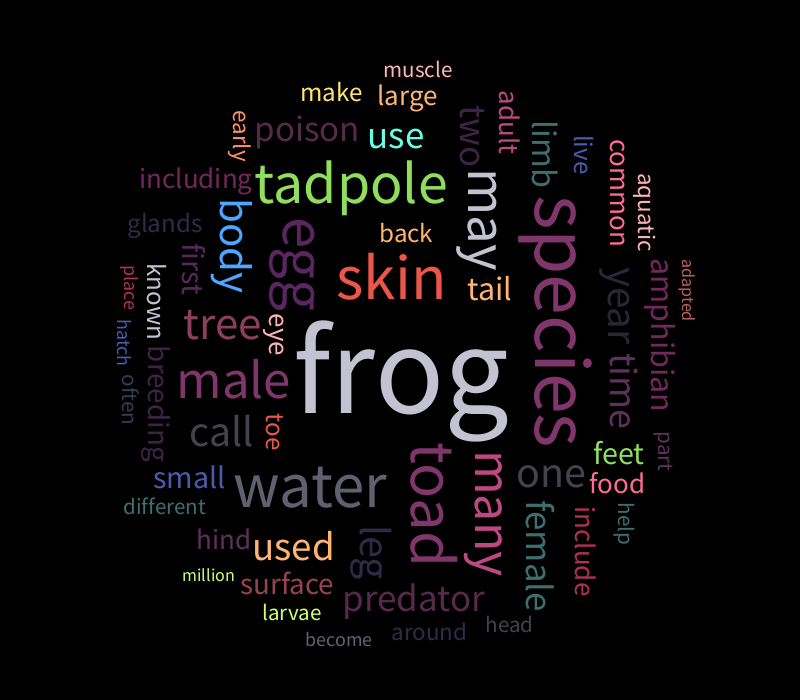